In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("diabetes.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Inspecting the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Ensuring there are no missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[128  22]
 [ 39  42]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       150
           1       0.66      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



Text(0.5, 1.0, 'ROC CURVE')

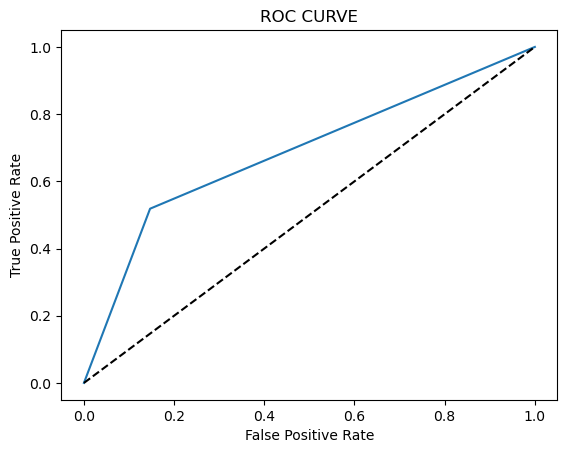

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")

In [47]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.6859259259259259


In [63]:
#Taking new inputs
import numpy as np

def predict_diabetes(model, input_data):
    input_array = np.array(input_data).reshape(1, -1)
    prediction = model.predict(input_array)
    return prediction

print("Please Answer The Questions Below to Know your Diabetic Status")

pregnancies = float(input("How many pregnancies have you had?"))
glucose = float(input("Glucose Level: "))
blood_pressure = float(input("Blood Pressure: "))
skin_thickness = float(input("Skin Thickness: "))
insulin = float(input("Insulin: "))
bmi = float(input("bmi: "))
diabetic_pf = float(input("Diabetic Pedigree Function: "))
age = float(input("Age: "))

input_data = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetic_pf, age]
prediction = predict_diabetes(logreg, input_data)
if prediction == 1:
    print("You have diabetes")
else:
    print("You don't have diabetes")

Please Answer The Questions Below to Know your Diabetic Status
How many pregnancies have you had?6
Glucose Level: 148
Blood Pressure: 72
Skin Thickness: 35
Insulin: 0
bmi: 33.6
Diabetic Pedigree Function: 0.627
Age: 50
You have diabetes
